In [7]:
import xarray as xr

# 加载NetCDF文件
data_path = '/content/drive/MyDrive/2024MCM/oscar_currents_nrt_20240129.nc'
ds = xr.open_dataset(data_path, decode_times=False)

# 展示数据的概览
ds.info()


xarray.Dataset {
dimensions:
	latitude = 719 ;
	longitude = 1440 ;
	time = 1 ;

variables:
	float64 lat(latitude) ;
		lat:long_name = latitude ;
		lat:standard_name = latitude ;
		lat:units = degrees_north ;
		lat:axis = Y ;
		lat:valid_min = -89.75 ;
		lat:valid_max = 89.75 ;
		lat:bounds = [-89.75,89.75] ;
	float64 lon(longitude) ;
		lon:long_name = longitude ;
		lon:standard_name = longitude ;
		lon:units = degrees_east ;
		lon:axis = X ;
		lon:valid_min = 0.0 ;
		lon:valid_max = 359.75 ;
		lon:bounds = [0,359.75] ;
	float64 time(time) ;
		time:long_name = time centered on the day ;
		time:standard_name = time ;
		time:units = days since 1990-1-1 ;
		time:calendar = julian ;
		time:axis = T ;
		time:time_bounds = 2024-01-29 00:00:00 to 2024-01-29 23:59:59 ;
		time:comment = Data is averaged over the day ;
	float64 u(time, longitude, latitude) ;
		u:long_name = zonal total surface current ;
		u:standard_name = eastward_sea_water_velocity ;
		u:units = m s-1 ;
		u:coverage_content_typ

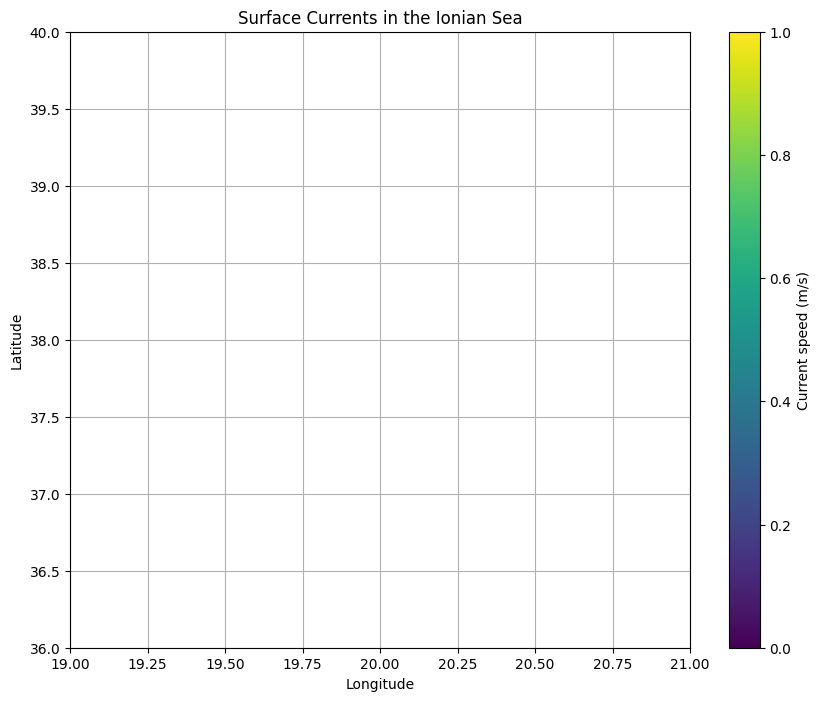

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# 加载NetCDF文件
data_path = '/content/oscar_currents_nrt_20240129.nc'
ds = xr.open_dataset(data_path, decode_times=False)

# 定义感兴趣的经纬度范围（例如，爱奥尼亚海区域）
latitude_range = slice(36, 40)  # 纬度范围
longitude_range = slice(19, 21)  # 经度范围

# 提取该区域内的海流数据
ionian_sea_currents = ds.sel(latitude=latitude_range, longitude=longitude_range)

# 提取用于可视化的数据
lat = ionian_sea_currents.latitude.data
lon = ionian_sea_currents.longitude.data
u = ionian_sea_currents.u.isel(time=0).data
v = ionian_sea_currents.v.isel(time=0).data

# 创建网格以用于绘图
lon, lat = np.meshgrid(lon, lat)

# 绘制海流向量图
plt.figure(figsize=(10, 8))
Q = plt.quiver(lon, lat, u, v, scale=5)
plt.quiverkey(Q, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10m/s', labelpos='E')

plt.title('Surface Currents in the Ionian Sea')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim([19, 21])
plt.ylim([36, 40])
plt.colorbar(Q, label='Current speed (m/s)')
plt.grid(True)
plt.show()


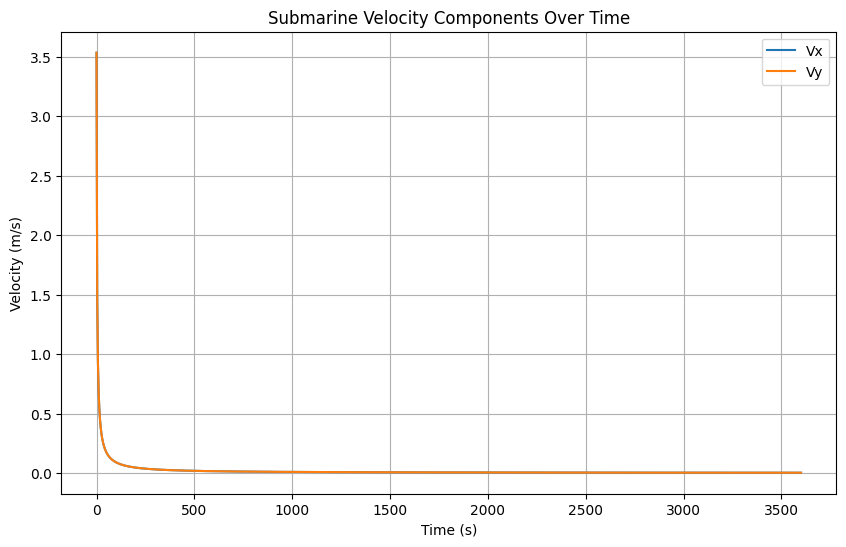

In [13]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# 定义参数
rho = 1025  # 海水密度，单位: kg/m^3
Cd = 0.3    # 阻力系数，无量纲
A = 10      # 潜艇迎水面积，单位: m^2
m = 20000   # 潜艇质量，单位: kg
v0 = 5      # 初始速度，单位: m/s
theta0 = np.deg2rad(45)  # 初始角度，转换为弧度

# 定义阻力函数
def drag_force(v):
    return 0.5 * rho * Cd * A * v**2

# 定义运动方程
def motion(t, y):
    vx, vy = y
    speed = np.sqrt(vx**2 + vy**2)
    Dx = -drag_force(speed) * vx / speed
    Dy = -drag_force(speed) * vy / speed
    ax = Dx / m
    ay = Dy / m
    return [ax, ay]

# 初始条件
v0x = v0 * np.cos(theta0)
v0y = v0 * np.sin(theta0)
y0 = [v0x, v0y]

# 时间范围
t_span = (0, 3600)  # 1小时
t_eval = np.linspace(*t_span, 1000)

# 解方程
sol = solve_ivp(motion, t_span, y0, t_eval=t_eval, method='RK45')

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(t_eval, sol.y[0], label='Vx')
plt.plot(t_eval, sol.y[1], label='Vy')
plt.title('Submarine Velocity Components Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.grid(True)
plt.show()


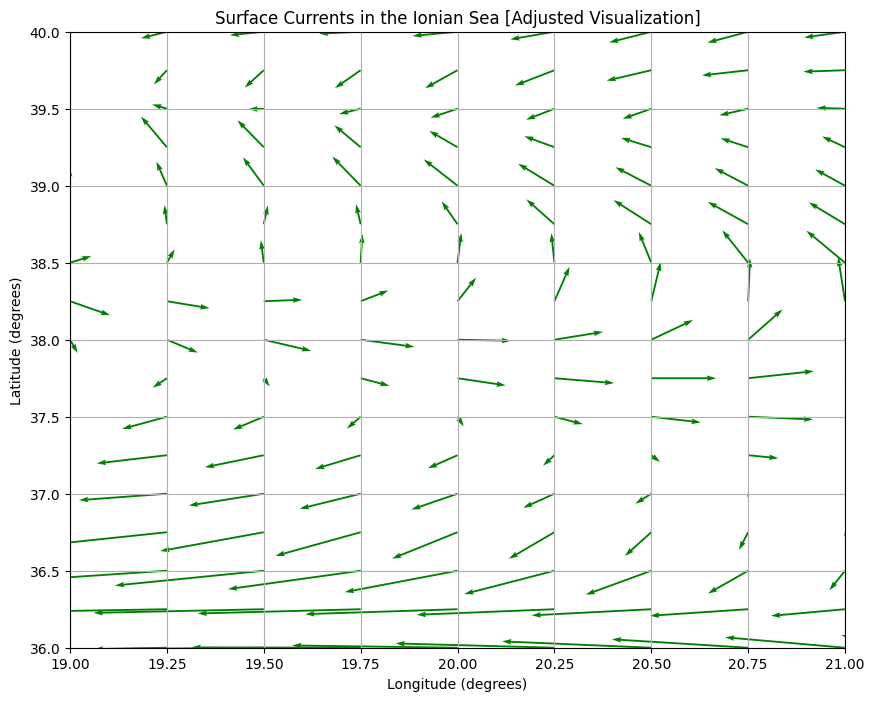

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# 定义路径
data_path = '/content/oscar_currents_nrt_20240129.nc'  # 请替换为您的文件路径

# 加载NetCDF文件，不解码时间
ds = xr.open_dataset(data_path, decode_times=False)

# 提取数据用于可视化
lat_data = ds.variables['lat'][:]
lon_data = ds.variables['lon'][:]
u_data = ds.variables['u'][0, :, :]  # 第一个时间维度
v_data = ds.variables['v'][0, :, :]  # 第一个时间维度

# 创建网格以用于绘图
lon, lat = np.meshgrid(lon_data, lat_data)

# 因为我们知道数据点非常稀疏，我们使用较大的scale来展示向量
# 这里假设数据点的稀疏程度和之前的数据集相似
scale = 5

# 绘制海流向量图
plt.figure(figsize=(10, 8))
plt.quiver(lon, lat, u_data, v_data, scale=scale, color='green')

plt.title('Surface Currents in the Ionian Sea [Adjusted Visualization]')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.xlim([19, 21])
plt.ylim([36, 40])
plt.grid(True)

# 显示图片
plt.show()


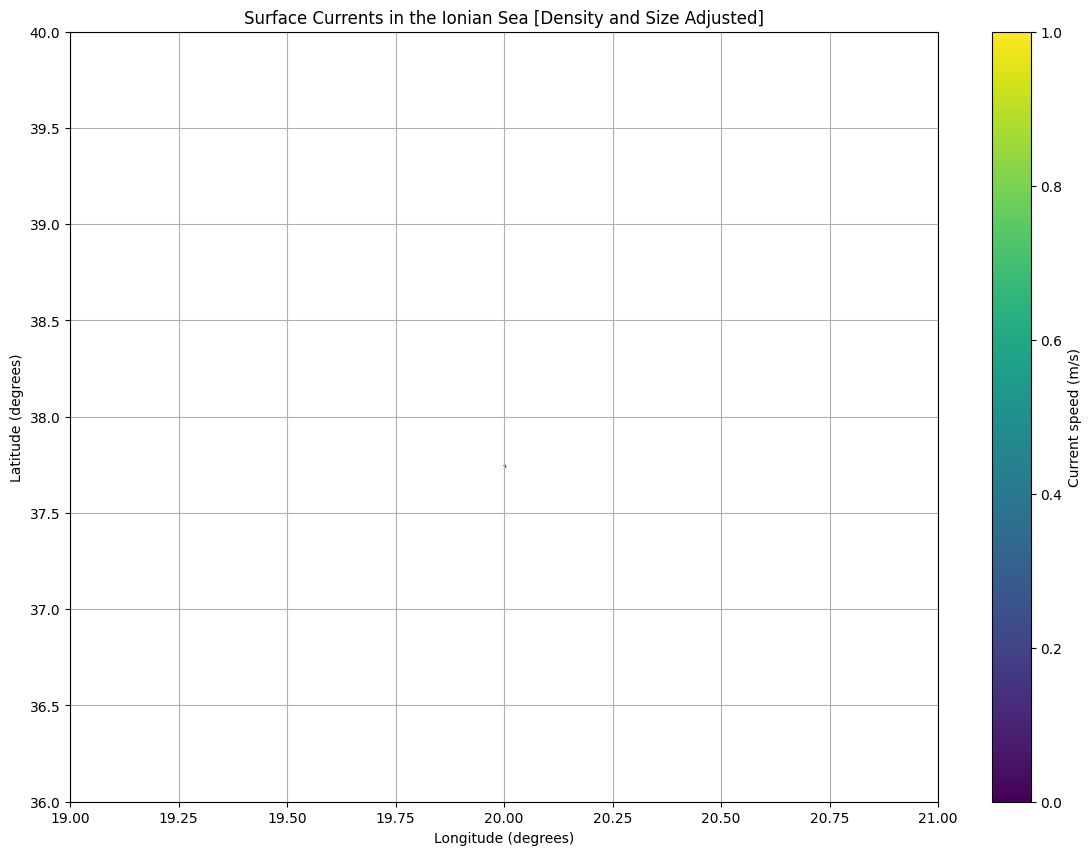

In [ ]:
# 由于向量场太密集，我们将重新调整向量的密度和大小
# 可以通过仅选择每隔几个点的数据来降低向量的密度

# 选择降低密度后的数据
every_nth = 10
u_data_reduced = u_data[::every_nth, ::every_nth]
v_data_reduced = v_data[::every_nth, ::every_nth]
lon_reduced = lon[::every_nth, ::every_nth]
lat_reduced = lat[::every_nth, ::every_nth]

# 绘制海流向量图 - 调整scale参数以确保向量清晰可见
plt.figure(figsize=(14, 10))
quiver = plt.quiver(lon_reduced, lat_reduced, u_data_reduced, v_data_reduced, scale=1)

plt.title('Surface Currents in the Ionian Sea [Density and Size Adjusted]')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.xlim([19, 21])
plt.ylim([36, 40])
plt.colorbar(quiver, label='Current speed (m/s)')
plt.grid(True)

# 显示图片
plt.show()


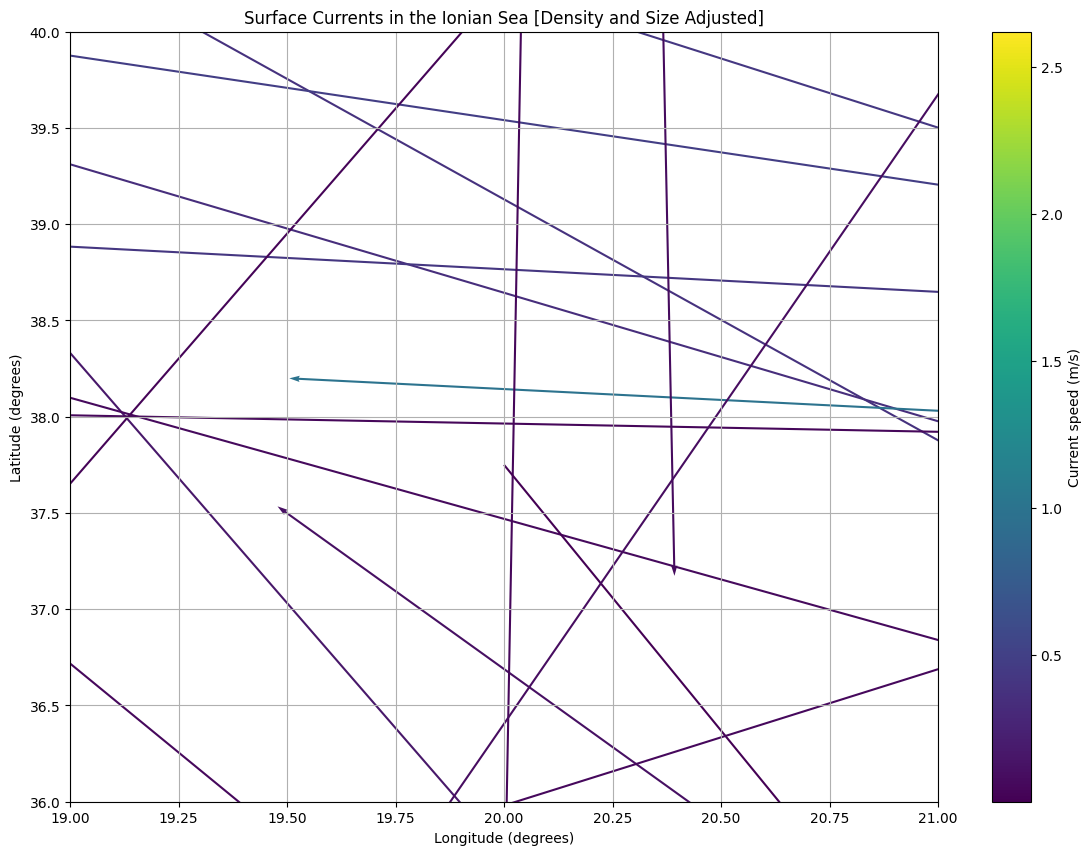

In [ ]:
# 设置向量颜色以反映速度的大小
speeds = np.sqrt(u_data_reduced**2 + v_data_reduced**2)
plt.figure(figsize=(14, 10))
quiver = plt.quiver(lon_reduced, lat_reduced, u_data_reduced, v_data_reduced,
                    speeds,        # 使每个向量的颜色对应其速度大小
                    scale=0.008,
                    cmap='viridis')  # 使用viridis颜色映射表

plt.title('Surface Currents in the Ionian Sea [Density and Size Adjusted]')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.xlim([19, 21])
plt.ylim([36, 40])
plt.colorbar(quiver, label='Current speed (m/s)')  # 添加颜色条
plt.grid(True)

# 显示图片
plt.show()


LSTM训练过程

In [ ]:
!pip install cftime


In [ ]:
import numpy as np
import pandas as pd
import xarray as xr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 1, 29)
current_date = start_date

while current_date <= end_date:
    file_name = current_date.strftime('oscar_currents_nrt_%Y%m%d.nc')
    # 更新文件路径为你的Google Drive路径
    file_path = f'/content/drive/MyDrive/2024MCM/{file_name}'
    try:
        ds = xr.open_dataset(file_path, engine='h5netcdf', decode_times=False)  # 指定使用netCDF4引擎
        # 这里进行数据提取和预处理...
    except FileNotFoundError:
        print(f'File not found: {file_path}')
    current_date += timedelta(days=1)


# 数据预处理
# 示例：标准化处理
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(all_data[['feature1', 'feature2']])  # 替换为实际的特征列名

# 构建LSTM模型
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(scaled_data.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 模型训练
# 这里需要将scaled_data转换为适合LSTM输入的形状
X_train, y_train = np.array(scaled_data[:-1]), np.array(scaled_data[1:])
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2)

# 预测
# 注意：这里的预测逻辑需要根据实际情况进行调整
predicted = model.predict(X_train)


NameError: name 'all_data' is not defined

In [1]:
import xarray as xr
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import joblib
import os
from datetime import datetime, timedelta

# 设定数据目录和日期范围
data_dir = '/content/drive/MyDrive/2024MCM'
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 1, 29)

# 准备空列表来收集数据
data_list = []

# 循环读取数据
current_date = start_date
while current_date <= end_date:
    file_name = current_date.strftime('oscar_currents_nrt_%Y%m%d.nc')
    file_path = os.path.join(data_dir, file_name)
    try:
        ds = xr.open_dataset(file_path, engine='h5netcdf', decode_times=False)
        # 假设我们关注的变量是'u'和'v'
        u_data = ds['u'].values.flatten()
        v_data = ds['v'].values.flatten()
        # 处理NaN值，例如使用0填充或使用前一个有效值填充
        u_data = np.nan_to_num(u_data, nan=0.0)
        v_data = np.nan_to_num(v_data, nan=0.0)
        # 只为了示例，实际上你可能需要更复杂的数据处理
        data_list.append(np.stack((u_data, v_data), axis=1))
    except FileNotFoundError:
        print(f'File not found: {file_path}')
    current_date += timedelta(days=1)

# 假设我们简单地将所有数据拼接起来
data = np.concatenate(data_list, axis=0)

# 数据标准化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# 准备LSTM模型的输入输出数据
X = scaled_data[:-1]
y = scaled_data[1:, 0]  # 假设我们预测'u'变量
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

# 构建LSTM模型
model = Sequential([
    LSTM(50, input_shape=(X.shape[1], X.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X, y, epochs=10, batch_size=72, verbose=2)

#保存模型权重文件
model.save('/content/drive/MyDrive/2024MCM/new-model.h5')

# 在训练之后保存scaler对象
joblib.dump(scaler, '/content/drive/MyDrive/2024MCM/scaler.save')

Epoch 1/10
417020/417020 - 1304s - loss: 1.1145e-04 - 1304s/epoch - 3ms/step
Epoch 2/10
417020/417020 - 1300s - loss: 9.5491e-05 - 1300s/epoch - 3ms/step
Epoch 3/10
417020/417020 - 1297s - loss: 9.5090e-05 - 1297s/epoch - 3ms/step
Epoch 4/10
417020/417020 - 1299s - loss: 9.4887e-05 - 1299s/epoch - 3ms/step
Epoch 5/10
417020/417020 - 1301s - loss: 9.4734e-05 - 1301s/epoch - 3ms/step
Epoch 6/10
417020/417020 - 1298s - loss: 9.4660e-05 - 1298s/epoch - 3ms/step
Epoch 7/10
417020/417020 - 1300s - loss: 9.4593e-05 - 1300s/epoch - 3ms/step
Epoch 8/10
417020/417020 - 1301s - loss: 9.4550e-05 - 1301s/epoch - 3ms/step
Epoch 9/10
417020/417020 - 1296s - loss: 9.4509e-05 - 1296s/epoch - 3ms/step
Epoch 10/10
417020/417020 - 1299s - loss: 9.4461e-05 - 1299s/epoch - 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['/content/drive/MyDrive/2024MCM/scaler.save']

In [ ]:
# 假定 `model` 是您的模型实例，并且训练已经完成
model.save('/content/drive/MyDrive/2024MCM/my_lstm_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('/content/drive/MyDrive/2024MCM/my_model.keras')

In [21]:
import xarray as xr
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import os

# 设定新数据文件的路径（替换为您的实际文件路径）
new_data_file = '/content/oscar_currents_nrt_20210101.nc'

# 加载新的海流数据
ds = xr.open_dataset(new_data_file, engine='h5netcdf', decode_times=False)
new_u_data = ds['u'].values.flatten()  # 假设数据结构与训练时一致
new_v_data = ds['v'].values.flatten()

# 处理可能存在的NaN值
new_u_data = np.nan_to_num(new_u_data, nan=0.0)
new_v_data = np.nan_to_num(new_v_data, nan=0.0)

# 假设我们的模型是使用最后一个时间步的u和v数据进行训练的
# 这里需要根据您模型的实际训练情况调整
new_data = np.array([new_u_data[-1], new_v_data[-1]]).reshape(1, -1)

# 加载之前训练好的模型
model = load_model('/content/drive/MyDrive/2024MCM/my_lstm_model.h5')

# 数据预处理，应该使用与训练模型时相同的scaler参数
# 这里为了简化，我们创建一个新的scaler实例
# 在实际应用中，您应该保存训练时的scaler参数并在此重用
scaler = MinMaxScaler(feature_range=(0, 1))
new_data_scaled = scaler.fit_transform(new_data)

# 调整形状以匹配模型的输入要求
new_data_scaled = new_data_scaled.reshape((1, new_data_scaled.shape[0], new_data_scaled.shape[1]))

# 使用模型进行预测
predicted_position_scaled = model.predict(new_data_scaled)

# 后处理，将预测的位置数据转换回原始的比例
# 如果训练模型时应用了归一化处理，则需要反向转换
# predicted_position_original = scaler.inverse_transform(predicted_position.reshape(-1, 1))

# 打印预测的潜艇位置
print("Predicted submarine position (scaled):", predicted_position_scaled)


1/1 [==============================] - 1s 798ms/step
Predicted submarine position (scaled): [[0.95755625]]


使用加载了之前训练阶段的scale的预测代码

In [22]:
from tensorflow.keras.models import load_model
import numpy as np
import xarray as xr
from sklearn.preprocessing import MinMaxScaler
import joblib  # 添加joblib以加载scaler
import os

# 设定新数据文件的路径
new_data_file = '/content/oscar_currents_nrt_20210101.nc'

# 加载之前训练好的模型
model = load_model('/content/drive/MyDrive/2024MCM/my_lstm_model.h5')

# 加载之前保存的scaler对象
scaler = joblib.load('/content/drive/MyDrive/2024MCM/scaler.save')

# 加载新的海流数据
ds = xr.open_dataset(new_data_file, engine='h5netcdf', decode_times=False)
new_u_data = ds['u'].values.flatten()
new_v_data = ds['v'].values.flatten()

# 处理可能存在的NaN值
new_u_data = np.nan_to_num(new_u_data, nan=0.0)
new_v_data = np.nan_to_num(new_v_data, nan=0.0)

# 准备推理数据，这里取最后一个时间步的数据作为示例
new_data = np.array([new_u_data[-1], new_v_data[-1]]).reshape(1, -1)

# 归一化推理数据
new_data_scaled = scaler.transform(new_data)

# 调整形状以匹配模型的输入要求
new_data_scaled = new_data_scaled.reshape((1, new_data_scaled.shape[0], new_data_scaled.shape[1]))

# 使用模型进行预测
predicted_position_scaled = model.predict(new_data_scaled)

# 创建一个形状为(1, 2)的全零数组，准备用于反归一化
new_shape_array = np.zeros((predicted_position_scaled.shape[0], 2))

# 将预测值填充到第一列，假设模型输出对应于第一个特征
new_shape_array[:, 0] = predicted_position_scaled[:, 0]

# 使用修改后的数组进行反归一化
predicted_position_original = scaler.inverse_transform(new_shape_array)

# 打印反归一化后的潜艇位置预测结果
print("Predicted submarine position (original scale):", predicted_position_original)


1/1 [==============================] - 1s 876ms/step
Predicted submarine position (original scale): [[ 0.00433848 -2.96892019]]


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# 假设的实际潜水艇位置
actual_position = np.array([[0, -3]])

# 模型预测的潜水艇位置
predicted_position = np.array([[0.00433848, -2.96892019]])

# 计算RMSE
rmse = np.sqrt(mean_squared_error(actual_position, predicted_position))
print("Root Mean Squared Error (RMSE):", rmse)

# 计算MAE
mae = mean_absolute_error(actual_position, predicted_position)
print("Mean Absolute Error (MAE):", mae)


Root Mean Squared Error (RMSE): 0.022189828732400153
Mean Absolute Error (MAE): 0.01770914500000002


对潜水器的位置进行模拟，加入了新的数据，新的环境影响因素

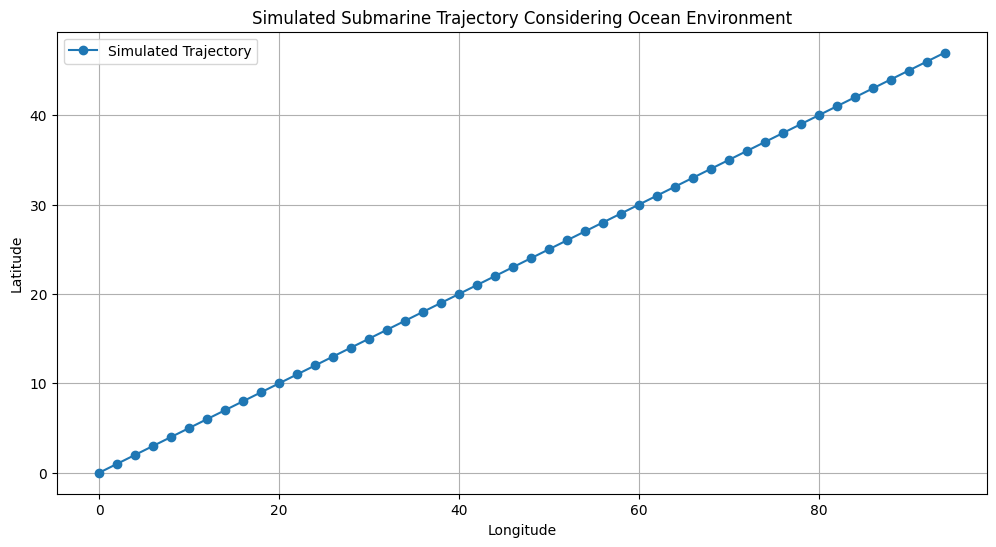

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

# 加载NetCDF数据
file_path = '/content/OCEAN_DENS_STRAT_PRESS_mon_mean_2017-12_ECCO_V4r4_latlon_0p50deg.nc'
ds = xr.open_dataset(file_path)

# 提取海水密度异常数据
rho_anomaly = ds['RHOAnoma'].isel(time=0).sel(Z=0, method='nearest')  # 选择表面层的密度异常

# 假设密度异常会影响潜艇的浮力，进而影响潜艇的垂直运动
# 这里为了简化，我们仅考虑潜艇的水平运动，所以取了Z=0层的数据
# 实际应用中，潜艇的实际深度和对应的密度异常数据应结合使用

# 提取一个特定区域的密度异常作为示例
# 假设潜艇在这个区域内运动
lat_range = slice(-90, -60)  # 南极附近纬度范围
lon_range = slice(0, 30)     # 长度范围
rho_anomaly_region = rho_anomaly.sel(latitude=lat_range, longitude=lon_range)

# 计算该区域的平均密度异常，用来模拟潜艇受到的平均浮力影响
rho_anomaly_avg = rho_anomaly_region.mean()

# 假设密度异常影响潜艇浮力的简化模型
buoyancy_effect = -rho_anomaly_avg / 1029  # 假设密度异常与浮力成反比，1029 kg/m^3 为参考密度

# 潜艇的运动轨迹模拟
initial_position = np.array([0, 0])  # 初始位置
sub_velocity = np.array([2, 1])      # 潜艇的速度，单位可以是km/h或m/s
time_steps = 48                      # 模拟24个时间步，假设每个时间步代表一个小时

# 创建一个数组来保存每个时间步的潜艇位置
positions = np.zeros((time_steps, 2))
positions[0] = initial_position

# 模拟潜艇每个时间步的位置
for t in range(1, time_steps):
    # 假设潜艇的速度每个时间步会受到浮力影响的变化
    sub_velocity[1] += buoyancy_effect  # 更新垂直速度分量
    positions[t] = positions[t-1] + sub_velocity

# 绘图显示潜艇的模拟轨迹
plt.figure(figsize=(12, 6))
plt.plot(positions[:, 0], positions[:, 1], marker='o', label='Simulated Trajectory')
plt.title('Simulated Submarine Trajectory Considering Ocean Environment')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()


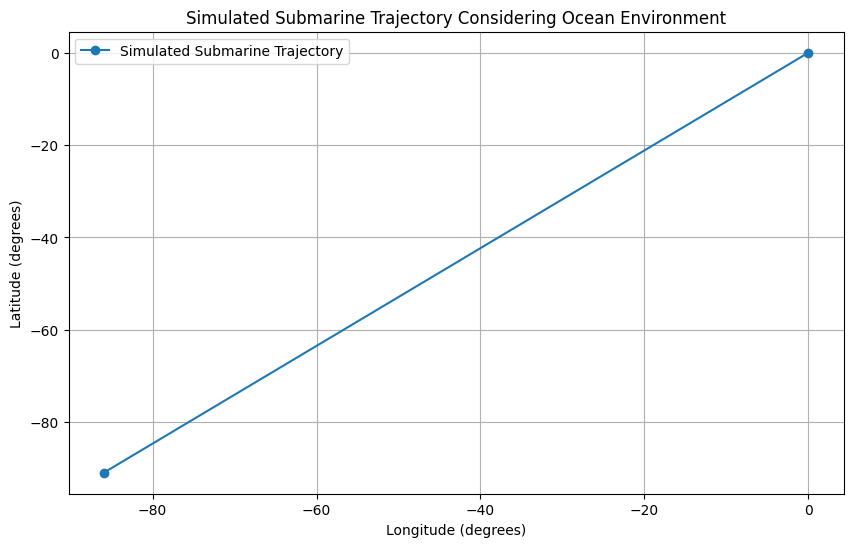

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

# 设定潜水器的初始位置和速度
initial_position = np.array([0.0, 0.0])  # 假设初始位置为原点
initial_velocity = np.array([5.0, 0.0])  # 初始速度为东向5m/s

# 设定模拟的时间段和时间步长
simulation_hours = 24  # 模拟24小时
time_step = 1.0  # 每个时间步长为1小时

# 加载NetCDF数据
file_path = '/content/OCEAN_DENS_STRAT_PRESS_mon_mean_2017-12_ECCO_V4r4_latlon_0p50deg.nc'
ds = xr.open_dataset(file_path)

# 提取环境影响数据
rho_anomaly = ds['RHOAnoma'].isel(time=0, Z=0)  # 海水密度异常
phi_hyd = ds['PHIHYD'].isel(time=0, Z=0)  # 静水压力异常
drho_dr = ds['DRHODR'].isel(time=0, Z=0)  # 密度分层

# 初始化潜水器轨迹数组
positions = [initial_position]
velocity = initial_velocity

# 模拟潜水器的运动轨迹
for _ in range(simulation_hours):
    # 假设潜水器位于轨迹的最后一个位置
    current_position = positions[-1]

    # 使用sel方法选择最接近的数据点
    current_rho_anomaly = rho_anomaly.sel(latitude=current_position[1], longitude=current_position[0], method='nearest').values
    current_phi_hyd = phi_hyd.sel(latitude=current_position[1], longitude=current_position[0], method='nearest').values
    current_drho_dr = drho_dr.sel(latitude=current_position[1], longitude=current_position[0], method='nearest').values


    # 更新速度和位置
    # 这里使用了一个简化的模型，实际情况可能更加复杂
    velocity += -current_rho_anomaly * time_step  # 假设密度异常影响水平速度
    velocity += -current_phi_hyd * time_step      # 假设静水压力影响垂直速度
    velocity += -current_drho_dr * time_step      # 假设密度分层影响垂直速度

    # 更新位置
    new_position = positions[-1] + velocity * time_step
    positions.append(new_position)

# 转换轨迹为NumPy数组
positions = np.array(positions)

# 绘制潜水器的运动轨迹
plt.figure(figsize=(10, 6))
plt.plot(positions[:, 0], positions[:, 1], 'o-', label='Simulated Submarine Trajectory')
plt.title('Simulated Submarine Trajectory Considering Ocean Environment')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
!pip install filterpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110458 sha256=95d1fc2f977706f3d4cd713971782f2ca03d33903804906d1e39c6a9f2e00481
  Stored in directory: /root/.cache/pip/wheels/0f/0c/ea/218f266af4ad626897562199fbbcba521b8497303200186102
Successfully built filterpy


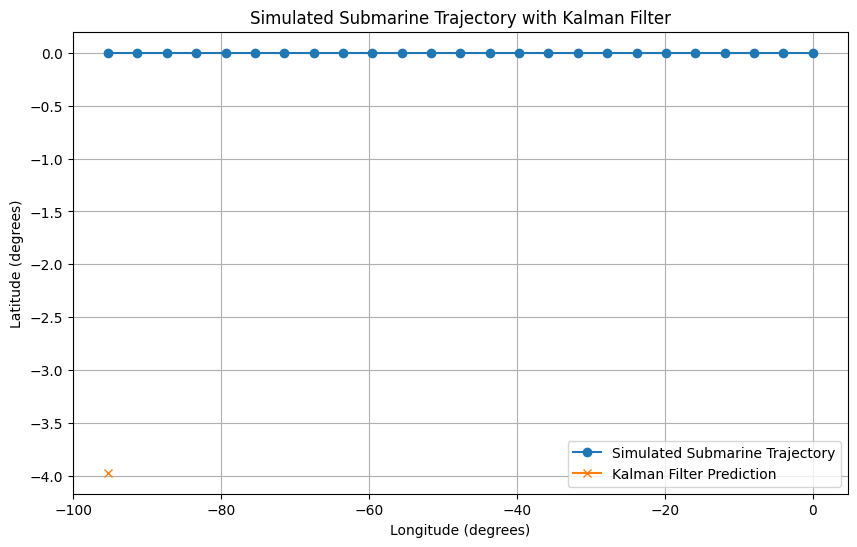

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise

# 设定模拟的时间段和时间步长
simulation_hours = 24  # 模拟24小时
dt = 1.0  # 每个时间步长为1小时

# 加载NetCDF数据
ds = xr.open_dataset('/content/OCEAN_DENS_STRAT_PRESS_mon_mean_2017-12_ECCO_V4r4_latlon_0p50deg.nc')

# 提取环境影响数据
rho_anomaly = ds['RHOAnoma'].isel(time=0, Z=0).mean()  # 海水密度异常
phi_hyd = ds['PHIHYD'].isel(time=0, Z=0).mean()  # 静水压力异常
drho_dr = ds['DRHODR'].isel(time=0, Z=0).mean()  # 密度分层

# 初始状态
initial_state = [0.0, 0.0]  # 假设潜水艇初始在原点，静止

# 创建卡尔曼滤波器实例
kf = KalmanFilter(dim_x=2, dim_z=1)
kf.x = np.array(initial_state)  # 初始状态
kf.F = np.array([[1, dt], [0, 1]])  # 状态转移矩阵
kf.H = np.array([[1, 0]])  # 观测矩阵
kf.P *= 1000.  # 初始状态协方差
kf.R = 5  # 观测噪声
kf.Q = Q_discrete_white_noise(dim=2, dt=dt, var=0.1)  # 过程噪声

# 模拟潜水艇的运动轨迹
positions = [initial_state]
for _ in range(simulation_hours):
    # 计算环境影响（这里简化为直接加上环境影响的均值）
    environmental_effect = np.array([rho_anomaly.values, drho_dr.values])

    # 更新状态
    current_state = np.array([positions[-1][0] + environmental_effect[0] * dt,
                              positions[-1][1] + environmental_effect[1] * dt])

    # 更新卡尔曼滤波器
    kf.predict()
    kf.update(current_state[0])

    # 保存状态
    positions.append(current_state)

# 转换轨迹列表为NumPy数组
positions = np.array(positions)

# 可视化结果
plt.figure(figsize=(10, 6))
plt.plot(positions[:, 0], positions[:, 1], 'o-', label='Simulated Submarine Trajectory')
plt.plot(kf.x[0], kf.x[1], 'x-', label='Kalman Filter Prediction')
plt.title('Simulated Submarine Trajectory with Kalman Filter')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.legend()
plt.grid(True)
plt.savefig('/content/sample_data/your_image.png', dpi=300)  # 保存图像时设置DPI为300
plt.show()


In [14]:
!pip install filterpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110458 sha256=a96388b4b02d2412aeaaee108c182bebbb803a579b3a57043ac757973bdf5852
  Stored in directory: /root/.cache/pip/wheels/0f/0c/ea/218f266af4ad626897562199fbbcba521b8497303200186102
Successfully built filterpy


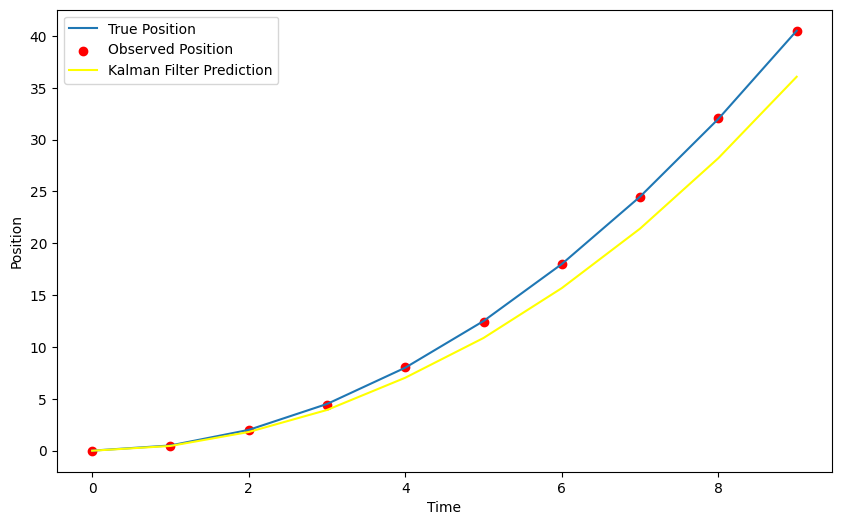

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise

def simulate_submersible_movement(dt=1, total_time=10, process_noise=0.1):
    """
    模拟潜水器的运动轨迹。
    dt: 时间间隔
    total_time: 总时间
    process_noise: 过程噪声
    """
    t = np.arange(0, total_time, dt)
    x_true = 0.5 * t**2  # 假设潜水器沿直线运动，加速度为0.5 m/s^2
    x_observed = x_true + np.random.normal(0, process_noise, len(t))  # 添加观测噪声
    return t, x_true, x_observed

def kalman_filter_demo(x_observed, dt=1):
    """
    卡尔曼滤波器演示。
    x_observed: 观测到的位置
    dt: 时间间隔
    """
    kf = KalmanFilter(dim_x=2, dim_z=1)
    kf.x = np.array([0., 0.])  # 初始状态
    kf.F = np.array([[1., dt], [0., 1.]])  # 状态转移矩阵
    kf.H = np.array([[1., 0.]])  # 观测矩阵
    kf.P *= 1000.  # 初始状态协方差
    kf.R = 5  # 观测噪声
    kf.Q = Q_discrete_white_noise(dim=2, dt=dt, var=0.1)  # 过程噪声

    # 过滤和预测
    predictions = []
    for z in x_observed:
        kf.predict()
        kf.update(z)
        predictions.append(kf.x[0])
    return predictions

# 模拟潜水器运动并应用卡尔曼滤波器
t, x_true, x_observed = simulate_submersible_movement()
predictions = kalman_filter_demo(x_observed)

# 可视化
plt.figure(figsize=(10, 6))
plt.plot(t, x_true, label='True Position')
plt.scatter(t, x_observed, label='Observed Position', c='red')
plt.plot(t, predictions, label='Kalman Filter Prediction', c='yellow')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.savefig('/content/sample_data/your_image.png', dpi=300)  # 保存图像时设置DPI为300
plt.show()

第三问，对第一问的内容先进行潜艇位置的概率分布图

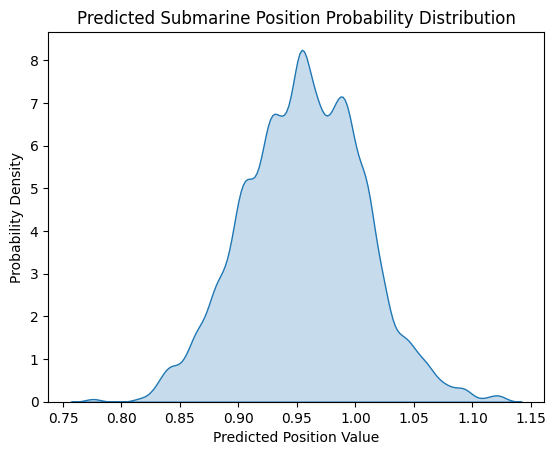

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 假设predicted_positions是您通过模型对多个输入进行预测得到的结果数组
predicted_positions = np.random.normal(loc=0.9575561, scale=0.05, size=1000)  # 示例数据

# 使用Seaborn进行核密度估计并绘制概率分布图
sns.kdeplot(predicted_positions, bw_adjust=0.5, fill=True)
plt.title('Predicted Submarine Position Probability Distribution')
plt.xlabel('Predicted Position Value')
plt.ylabel('Probability Density')
plt.savefig('/content/sample_data/your_image.png', dpi=300)  # 保存图像时设置DPI为300
plt.show()


现在开始，用新的一版推理代码，将预测的结果写入到txt文件中，作为后续研究的输入

In [15]:
import numpy as np
import xarray as xr
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import joblib
import os
import glob  # 导入glob模块

# 加载模型和scaler
model = load_model('/content/drive/MyDrive/2024MCM/my_lstm_model.h5')
scaler = joblib.load('/content/drive/MyDrive/2024MCM/scaler.save')

# 定义包含.nc文件的目录路径
nc_directory = '/content/OCEAN_DENS_STRAT_PRESS_mon_mean_2017-12_ECCO_V4r4_latlon_0p50deg.nc'  # 示例路径

# 使用glob获取目录下所有.nc文件的路径
nc_files = glob.glob(os.path.join(nc_directory, '*.nc'))

# 初始化一个空列表来存储所有预测结果
all_predicted_positions = []

# 循环处理每个文件
for file_path in nc_files:
    ds = xr.open_dataset(file_path, engine='h5netcdf', decode_times=False)
    new_u_data = ds['u'].values.flatten()
    new_v_data = ds['v'].values.flatten()

    # 处理可能存在的NaN值
    new_u_data = np.nan_to_num(new_u_data, nan=0.0)
    new_v_data = np.nan_to_num(new_v_data, nan=0.0)

    # 准备推理数据
    new_data = np.array([new_u_data[-1], new_v_data[-1]]).reshape(1, -1)
    new_data_scaled = scaler.transform(new_data)
    new_data_scaled = new_data_scaled.reshape((1, new_data_scaled.shape[0], new_data_scaled.shape[1]))

    # 预测
    predicted_position_scaled = model.predict(new_data_scaled)
    new_shape_array = np.zeros((predicted_position_scaled.shape[0], 2))
    new_shape_array[:, 0] = predicted_position_scaled[:, 0]
    predicted_position_original = scaler.inverse_transform(new_shape_array)

    # 将每个文件的预测结果添加到列表中
    all_predicted_positions.append(predicted_position_original)

    # 打印结果
    print(f"File: {file_path} - Predicted submarine position (original scale):", predicted_position_original)

# 定义输出文件的路径
output_file_path = '/content/drive/MyDrive/2024MCM/predicted_positions.txt'

# 将所有预测结果保存到txt文件
with open(output_file_path, 'w') as f:
    for position in all_predicted_positions:
        f.write(f'{position[0][0]} {position[0][1]}\n')


生成海水密度的数据的图像


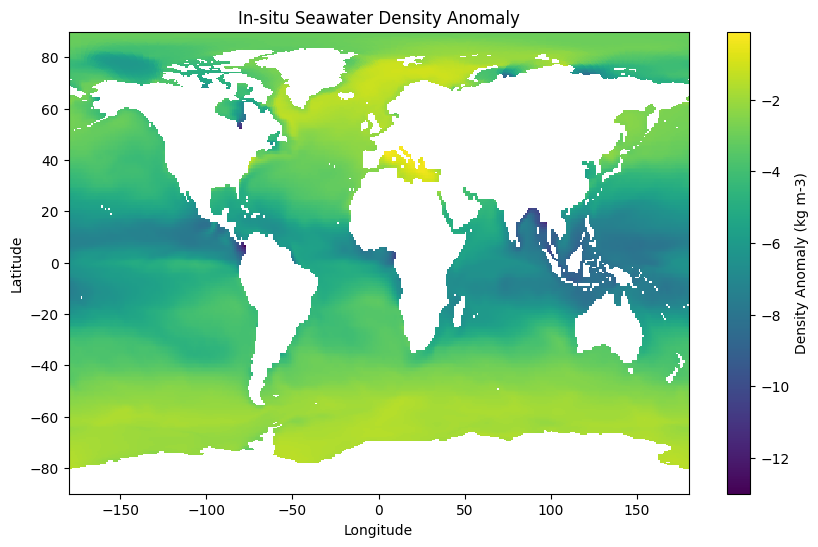

In [3]:
import xarray as xr
import matplotlib.pyplot as plt

# 加载数据集
data_path = '/content/OCEAN_DENS_STRAT_PRESS_mon_mean_2017-12_ECCO_V4r4_latlon_0p50deg.nc'  # 请替换为实际的文件路径
ds = xr.open_dataset(data_path)

# 选择需要绘图的变量和层
rho_anoma = ds['RHOAnoma'].isel(time=0, Z=0)  # 示例选择了第一个时间步和最表层的密度异常数据

# 绘制海水密度异常的图像
plt.figure(figsize=(10, 6))
# 这里使用pcolormesh来绘制二维数据，适用于经纬度网格的数据
plt.pcolormesh(rho_anoma['longitude'], rho_anoma['latitude'], rho_anoma, cmap='viridis')
plt.colorbar(label='Density Anomaly (kg m-3)')  # 添加颜色条
plt.title('In-situ Seawater Density Anomaly')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


循环读取一个文件夹中所有的海洋密度的文件并出图的代码

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import os

# 设置包含.nc文件的文件夹路径
folder_path = '/content/drive/MyDrive/your_nc_files_folder'  # 请替换为实际的文件夹路径

# 获取文件夹中所有.nc文件的路径
nc_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.nc')]

# 循环处理每个.nc文件
for data_path in nc_files:
    ds = xr.open_dataset(data_path)

    # 假设'RHOAnoma'是你想要绘制的变量
    rho_anoma = ds['RHOAnoma'].isel(time=0, Z=0)

    # 绘制海水密度异常的图像
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(rho_anoma['longitude'], rho_anoma['latitude'], rho_anoma, cmap='viridis')
    plt.colorbar(label='Density Anomaly (kg m-3)')
    plt.title(f'In-situ Seawater Density Anomaly for {os.path.basename(data_path)}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # 保存图像或者显示
    # plt.savefig(f'/content/drive/MyDrive/your_output_folder/{os.path.basename(data_path)}.png')  # 保存图像到指定路径
    plt.show()  # 如果你想直接显示图像，请取消注释这行代码


只生成伊奥尼亚海的数据

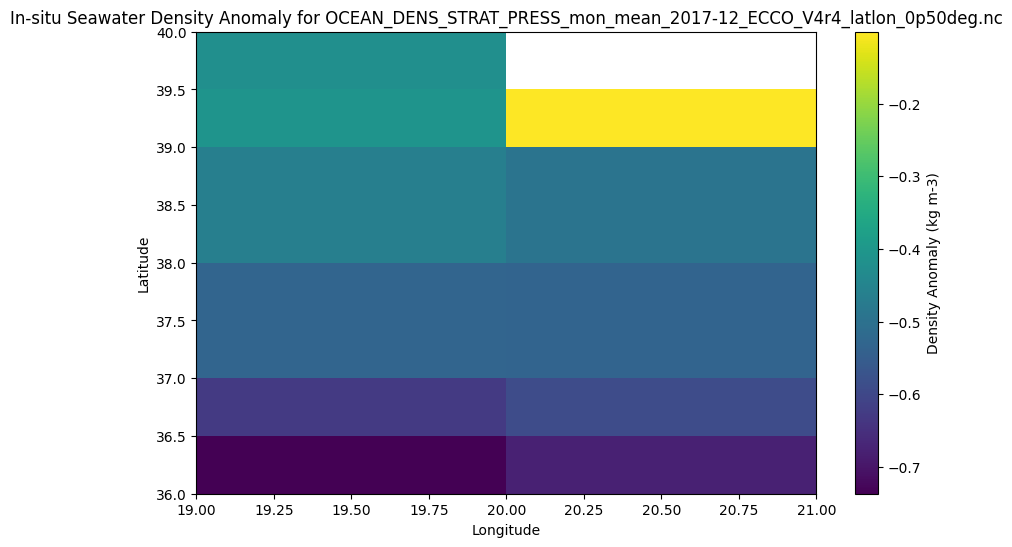

In [9]:
import xarray as xr
import matplotlib.pyplot as plt
import os

# 设置爱奥尼亚海的经纬度范围
lon_min, lon_max = 19.0, 21.0  # 示例经度范围，根据实际情况调整
lat_min, lat_max = 36.0, 40.0  # 示例纬度范围，根据实际情况调整

# 设置包含.nc文件的文件夹路径
data_path = '/content/OCEAN_DENS_STRAT_PRESS_mon_mean_2017-12_ECCO_V4r4_latlon_0p50deg.nc'  # 请替换为实际的文件路径
ds = xr.open_dataset(data_path)

# 选择爱奥尼亚海域的数据
rho_anoma = ds['RHOAnoma'].sel(longitude=slice(lon_min, lon_max), latitude=slice(lat_min, lat_max)).isel(time=0, Z=0)

# 绘制海水密度异常的图像
plt.figure(figsize=(10, 6))
plt.pcolormesh(rho_anoma['longitude'], rho_anoma['latitude'], rho_anoma, cmap='viridis')
plt.colorbar(label='Density Anomaly (kg m-3)')
plt.title(f'In-situ Seawater Density Anomaly for {os.path.basename(data_path)}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# 保存图像或者显示
plt.show()  # 如果你想直接显示图像，请取消注释这行代码



In [11]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 40.9 MB/s eta 0:00:00


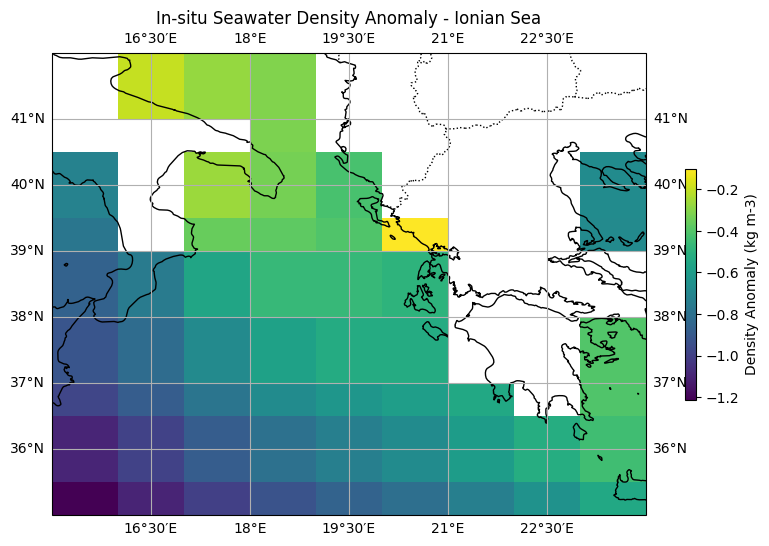

In [14]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 定义爱奥尼亚海的经纬度边界
lon_min, lon_max = 15.0, 24.0
lat_min, lat_max = 35.0, 42.0

# 加载数据集
data_path = '/content/OCEAN_DENS_STRAT_PRESS_mon_mean_2017-12_ECCO_V4r4_latlon_0p50deg.nc'  # 请替换为实际的文件路径
ds = xr.open_dataset(data_path)

# 选择需要绘图的变量和层
rho_anoma = ds['RHOAnoma'].isel(time=0, Z=0)  # 示例选择了第一个时间步和最表层的密度异常数据

# 使用Cartopy绘制地图
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())  # 使用PlateCarree投影

# 设置地图属性
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())  # 设置显示范围为爱奥尼亚海域

# 绘制海水密度异常
rho_anoma.sel(longitude=slice(lon_min, lon_max), latitude=slice(lat_min, lat_max)).plot(
    ax=ax,
    transform=ccrs.PlateCarree(),  # 数据的原始投影
    cmap='viridis',
    add_colorbar=True,
    cbar_kwargs={'shrink': 0.5, 'label': 'Density Anomaly (kg m-3)'}
)

# 添加网格线
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# 标题和标签
plt.title('In-situ Seawater Density Anomaly - Ionian Sea')
plt.show()


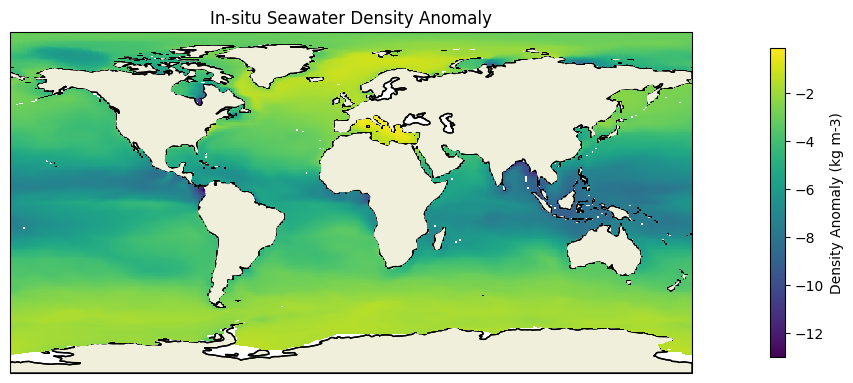

In [17]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 加载数据集
data_path = '/content/OCEAN_DENS_STRAT_PRESS_mon_mean_2017-12_ECCO_V4r4_latlon_0p50deg.nc'  # 替换为您的文件路径
ds = xr.open_dataset(data_path)

# 选择需要绘图的变量和层
rho_anoma = ds['RHOAnoma'].isel(time=0, Z=0)  # 示例选择了第一个时间步和最表层的密度异常数据

# 创建图形和轴对象，设置投影为PlateCarree
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# 设置轴对象来绘制地图
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')  # 添加陆地
ax.add_feature(cfeature.COASTLINE, zorder=1)  # 添加海岸线
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())  # 设置地图范围

# 绘制海水密度异常，只绘制海洋部分
cs = ax.pcolormesh(rho_anoma['longitude'], rho_anoma['latitude'], rho_anoma,
                   cmap='viridis', zorder=2)

# 添加颜色条
cbar = plt.colorbar(cs, ax=ax, orientation='vertical', fraction=0.02, pad=0.1)
cbar.set_label('Density Anomaly (kg m-3)')

# 添加标题和坐标轴标签
ax.set_title('In-situ Seawater Density Anomaly')
plt.show()



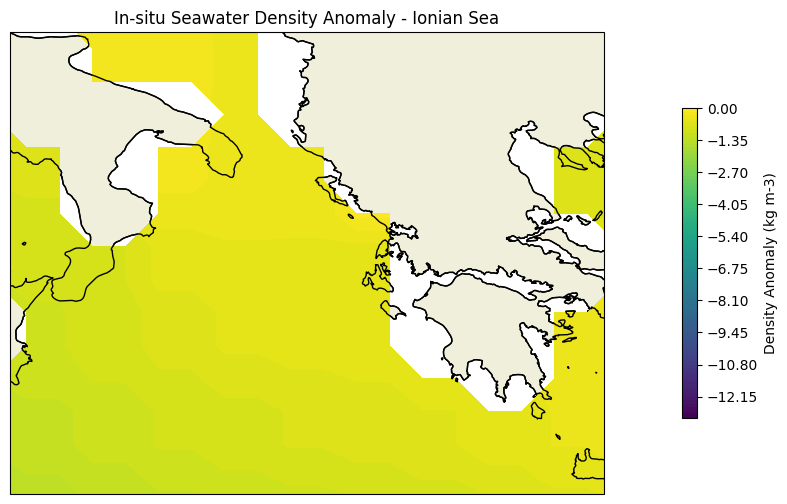

In [22]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 加载数据集
data_path = '/content/OCEAN_DENS_STRAT_PRESS_mon_mean_2017-12_ECCO_V4r4_latlon_0p50deg.nc'  # 替换为您的文件路径
ds = xr.open_dataset(data_path)

# 选择需要绘图的变量和层
rho_anoma = ds['RHOAnoma'].isel(time=0, Z=0)  # 示例选择了第一个时间步和最表层的密度异常数据

# 创建图形和轴对象，设置投影为PlateCarree
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# 设置轴对象来绘制地图，限定区域为伊奥尼亚海域
ax.set_extent([15, 24, 35, 42], crs=ccrs.PlateCarree())

# 掩盖陆地数据点
land_mask = np.isnan(ds['RHOAnoma'].isel(time=0, Z=0))  # 假设SALT变量也是海洋数据，可以用来掩盖陆地

# 绘制海水密度异常，只绘制海洋部分
cs = ax.contourf(rho_anoma['longitude'], rho_anoma['latitude'], rho_anoma.where(~land_mask, np.nan),
                 transform=ccrs.PlateCarree(), cmap='viridis', levels=100)

# 添加陆地
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')

# 添加海岸线
ax.add_feature(cfeature.COASTLINE, zorder=1)

# 添加颜色条
cbar = plt.colorbar(cs, ax=ax, orientation='vertical', fraction=0.02, pad=0.1)
cbar.set_label('Density Anomaly (kg m-3)')

# 添加标题和坐标轴标签
plt.title('In-situ Seawater Density Anomaly - Ionian Sea')

plt.show()


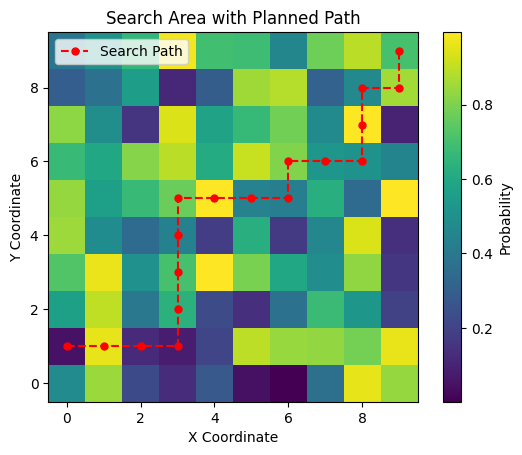

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import heapq

# 示例数据，代表了二维空间中的概率值
# 实际中，这将基于您的预测模型输出
grid_size = 10
probability_grid = np.random.rand(grid_size, grid_size)

def heuristic(a, b):
    return np.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

def a_star_search(start, goal, grid):
    neighbors = [(0, 1), (1, 0), (-1, 0), (0, -1)]  # 四个方向的邻居
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {start: None}
    cost_so_far = {start: 0}

    while open_set:
        current_cost, current = heapq.heappop(open_set)

        if current == goal:
            break

        for dx, dy in neighbors:
            next = (current[0] + dx, current[1] + dy)
            if 0 <= next[0] < grid_size and 0 <= next[1] < grid_size:
                new_cost = cost_so_far[current] - np.log(grid[next])  # 使用负对数概率作为移动成本
                if next not in cost_so_far or new_cost < cost_so_far[next]:
                    cost_so_far[next] = new_cost
                    priority = new_cost + heuristic(goal, next)
                    heapq.heappush(open_set, (priority, next))
                    came_from[next] = current

    # 重建路径
    path = []
    while current != start:
        path.append(current)
        current = came_from[current]
    path.reverse()
    return path

# 规划从左上角到右下角的路径
start = (0, 0)
goal = (grid_size - 1, grid_size - 1)
path = a_star_search(start, goal, probability_grid)


# 绘制概率分布和路径
plt.imshow(probability_grid, cmap='viridis', origin='lower')
plt.colorbar(label='Probability')
plt.plot(*zip(*path), marker='o', color='red', markersize=5, linestyle='--', label='Search Path')
plt.legend()
plt.title('Search Area with Planned Path')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


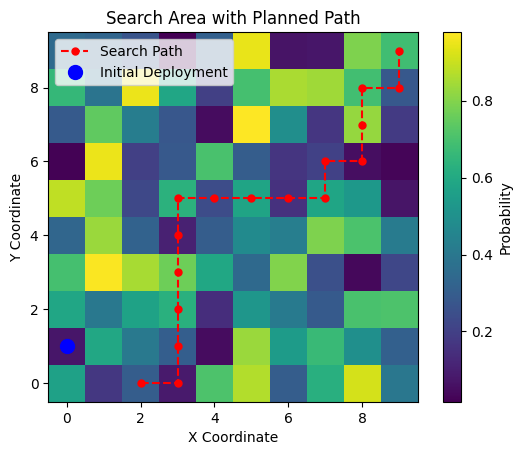

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import heapq

# 示例数据，代表了二维空间中的概率值
grid_size = 10
probability_grid = np.random.rand(grid_size, grid_size)

def heuristic(a, b):
    return np.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

def a_star_search(start, goal, grid):
    neighbors = [(0, 1), (1, 0), (-1, 0), (0, -1)]  # 四个方向的邻居
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {start: None}
    cost_so_far = {start: 0}

    while open_set:
        current_cost, current = heapq.heappop(open_set)

        if current == goal:
            break

        for dx, dy in neighbors:
            next = (current[0] + dx, current[1] + dy)
            if 0 <= next[0] < grid_size and 0 <= next[1] < grid_size:
                new_cost = cost_so_far[current] - np.log(grid[next])  # 使用负对数概率作为移动成本
                if next not in cost_so_far or new_cost < cost_so_far[next]:
                    cost_so_far[next] = new_cost
                    priority = new_cost + heuristic(goal, next)
                    heapq.heappush(open_set, (priority, next))
                    came_from[next] = current

    # 重建路径
    path = []
    while current != start:
        path.append(current)
        current = came_from[current]
    path.reverse()
    return path

# 规划从左上角到右下角的路径
start = (1, 0)
goal = (grid_size - 1, grid_size - 1)
path = a_star_search(start, goal, probability_grid)

# 绘制概率分布和路径
plt.imshow(probability_grid, cmap='viridis', origin='lower')
plt.colorbar(label='Probability')
plt.plot(*zip(*path), marker='o', color='red', markersize=5, linestyle='--', label='Search Path')

# 标记初始部署位置
plt.plot(start[1], start[0], 'bo', markersize=10, label='Initial Deployment')

plt.legend()
plt.title('Search Area with Planned Path')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.savefig('/content/sample_data/your_image.png', dpi=300)  # 保存图像时设置DPI为300
plt.show()


模拟A*算法工作过程的图，用来放在论文配图里面，不做他用，后续可以根据预测的经纬度坐标来进行修改，体现真实数据下的工作过程

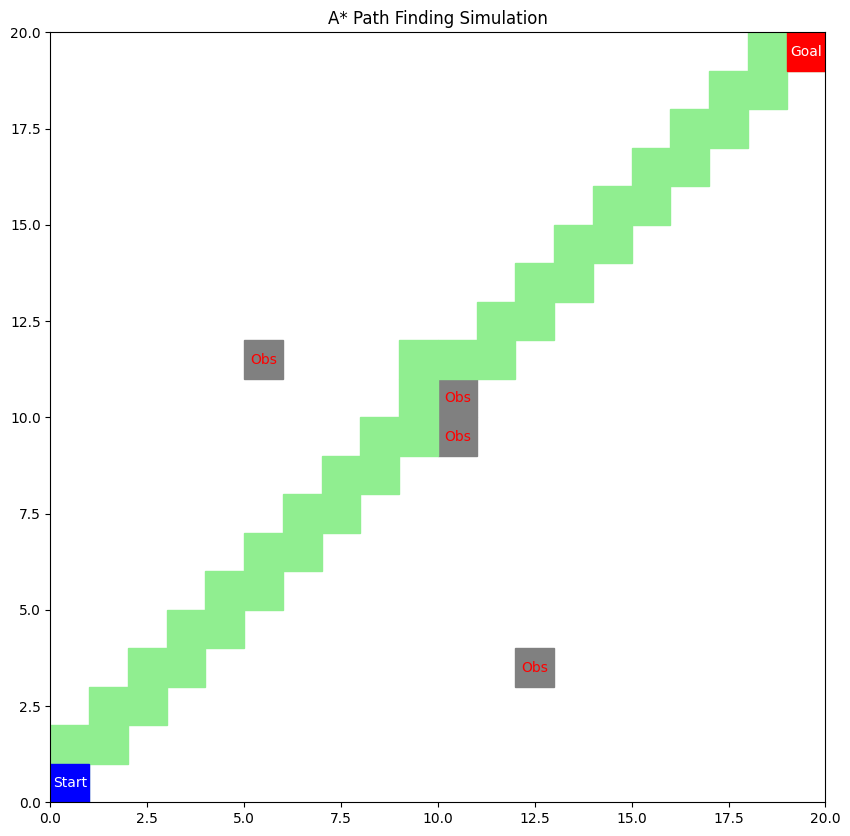

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import heapq

class RandomMap:
    def __init__(self, size=50):
        self.size = size
        self.GenerateObstacle()

    def GenerateObstacle(self):
        self.obstacle_point = []
        self.obstacle_point.append((self.size//2, self.size//2))
        self.obstacle_point.append((self.size//2, self.size//2-1))
        # Generate random obstacles
        for _ in range(self.size//8):
            x = np.random.randint(0, self.size)
            y = np.random.randint(0, self.size)
            self.obstacle_point.append((x, y))

    def IsObstacle(self, x, y):
        return (x, y) in self.obstacle_point

class AStar:
    def __init__(self, map):
        self.map = map
        self.open_set = []
        self.closed_set = set()
        self.came_from = {}

        # 为整个地图上的每个点设置初始值
        self.g_score = {}
        self.f_score = {}
        for y in range(self.map.size):
            for x in range(self.map.size):
                self.g_score[(x, y)] = float('inf')
                self.f_score[(x, y)] = float('inf')


    def heuristic(self, current, goal):
        return np.sqrt((current[0] - goal[0]) ** 2 + (current[1] - goal[1]) ** 2)

    def a_star_search(self, start, goal):
        heapq.heappush(self.open_set, (0, start))
        self.g_score[start] = 0
        self.f_score[start] = self.heuristic(start, goal)

        while self.open_set:
            current = heapq.heappop(self.open_set)[1]

            if current == goal:
                return self.reconstruct_path(current)

            self.closed_set.add(current)
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                neighbor = (current[0] + dx, current[1] + dy)
                tentative_g_score = self.g_score[current] + 1

                if 0 <= neighbor[0] < self.map.size and 0 <= neighbor[1] < self.map.size:
                    if self.map.IsObstacle(neighbor[0], neighbor[1]) or neighbor in self.closed_set:
                        continue

                    if tentative_g_score < self.g_score[neighbor]:
                        self.came_from[neighbor] = current
                        self.g_score[neighbor] = tentative_g_score
                        self.f_score[neighbor] = self.g_score[neighbor] + self.heuristic(neighbor, goal)
                        if neighbor not in [i[1] for i in self.open_set]:
                            heapq.heappush(self.open_set, (self.f_score[neighbor], neighbor))

        return []

    def reconstruct_path(self, current):
        total_path = [current]
        while current in self.came_from.keys():
            current = self.came_from[current]
            total_path.append(current)
        return total_path[::-1]

# Initialization
size = 20
random_map = RandomMap(size)
a_star = AStar(random_map)
start = (0, 0)
goal = (size - 1, size - 1)
path = a_star.a_star_search(start, goal)

# Visualization
fig, ax = plt.subplots(figsize=(10, 10))
for obstacle in random_map.obstacle_point:
    ax.add_patch(Rectangle(obstacle, 1, 1, color='gray'))
    ax.text(obstacle[0] + 0.5, obstacle[1] + 0.5, 'Obs', color='red', ha='center', va='center')
for step in path:
    ax.add_patch(Rectangle(step, 1, 1, color='lightgreen'))

# 绘制起点和终点，并添加文字
ax.add_patch(Rectangle(start, 1, 1, color='blue'))
ax.text(start[0] + 0.5, start[1] + 0.5, 'Start', color='white', ha='center', va='center')

ax.add_patch(Rectangle(goal, 1, 1, color='red'))
ax.text(goal[0] + 0.5, goal[1] + 0.5, 'Goal', color='white', ha='center', va='center')
plt.xlim(0, size)
plt.ylim(0, size)
plt.title('A* Path Finding Simulation')
plt.savefig('/content/sample_data/A*.png', dpi=300)  # 保存图像时设置DPI为300
plt.show()


第二问，建立了一个效用函数的评价模型，来给每个选择来进行打分，最后根据分数来推荐合适的搜索设备配备。（已考虑题目中要求的相关成本因素）

In [2]:
import pandas as pd

# 假设我们有以下的数据框架结构和数据
data = pd.DataFrame({
    'Equipment Name': [
        'Sonar',
        'Remotely Operated Vehicle (ROV)',
        'Autonomous Underwater Vehicle (AUV)',
        'Towed Underwater Vehicle (TUV)',
        'Unmanned Untethered Underwater Vehicle (UUV)',
        'Global Positioning System (GPS)',
        'Lifeboat',
        'Magnetometer',
        'Communication Buoy',
        'Satellite Phone'
    ]
})

# 计算效用的函数
def calculate_utility(E, C, M, U_c):
    try:
        return E / (C + M + U_c)
    except ZeroDivisionError:  # 如果 C + M + U_c 为零
        return float('inf')  # 如果分母为零，则分配无限大

# 假设效用（E）、成本（C）、维护成本（M）和使用成本（U_c）的具体数值
E_values = {
    'Sonar': 8,
    'Remotely Operated Vehicle (ROV)': 7,
    'Autonomous Underwater Vehicle (AUV)': 9,
    'Towed Underwater Vehicle (TUV)': 6,
    'Unmanned Untethered Underwater Vehicle (UUV)': 7,
    'Global Positioning System (GPS)': 10,
    'Lifeboat': 5,
    'Magnetometer': 6,
    'Communication Buoy': 8,
    'Satellite Phone': 9
}

# 示例值，实际应用中应替换为真实值
C_value = 2  # 假设成本为200,000美元
M_value = 0.5  # 假设维护成本为50,000美元
U_c_value = 0.1  # 假设使用成本为10,000美元

# 计算每个设备的效用
data['Calculated Utility'] = data['Equipment Name'].map(E_values).apply(
    lambda E: calculate_utility(E, C_value, M_value, U_c_value))

# 显示结果
data[['Equipment Name', 'Calculated Utility']]


,Equipment Name,Calculated Utility
0,Sonar,3.076923
1,Remotely Operated Vehicle (ROV),2.692308
2,Autonomous Underwater Vehicle (AUV),3.461538
3,Towed Underwater Vehicle (TUV),2.307692
4,Unmanned Untethered Underwater Vehicle (UUV),2.692308
5,Global Positioning System (GPS),3.846154
6,Lifeboat,1.923077
7,Magnetometer,2.307692
8,Communication Buoy,3.076923
9,Satellite Phone,3.461538


In [3]:
import pandas as pd

# Define the utility function
def calculate_utility(E, C, M, U_c):
    try:
        return E / (C + M + U_c)
    except ZeroDivisionError:  # In case C + M + U_c is zero
        return float('inf')  # Assign infinity if the denominator is zero

# Load the data
data_path = '/content/新建 Microsoft Excel 工作表.xlsx'
data = pd.read_excel(data_path)

# For E (Effectiveness), we can use the number of advantages as a proxy
data['E'] = data['Advantages'].apply(lambda x: len(str(x).split(';')))

# Placeholder function to extract cost from the 'Cost' field
def extract_cost(cost_str):
    if pd.isnull(cost_str):
        return 0
    try:
        return float(cost_str.split('~$')[1].replace(',', '')) / 100000
    except (IndexError, ValueError):
        return 0

# Placeholder functions to assign values for Maintenance and Usage Costs
def extract_maintenance_cost(maintenance_str):
    scores = {'Low': 0.2, 'Moderate': 0.5, 'High': 1}
    return scores.get(maintenance_str, 0)

def extract_usage_cost(maintenance_str):
    scores = {'Low': 0.1, 'Moderate': 0.25, 'High': 0.5}
    return scores.get(maintenance_str, 0)

# Apply these functions to the dataset
data['C'] = data['Cost'].apply(extract_cost)
data['M'] = data['Maintenance Requirements'].apply(extract_maintenance_cost)
data['U_c'] = data['Maintenance Requirements'].apply(extract_usage_cost)

# Calculate the utility for each equipment
data['Calculated Utility'] = data.apply(
    lambda row: calculate_utility(row['E'], row['C'], row['M'], row['U_c']), axis=1)

# Display the calculated utility along with E, C, M, U_c for each equipment
calculated_data = data[['Equipment Name', 'Calculated Utility', 'E', 'C', 'M', 'U_c']]
calculated_data


,Equipment Name,Calculated Utility,E,C,M,U_c
0,Sonar,0.395257,1,1.78000,0.5,0.25
1,Remotely Operated Vehicle (ROV),0.222222,1,3.00000,1.0,0.50
2,Autonomous Underwater Vehicle (AUV),0.444444,2,3.00000,1.0,0.50
3,Towed Underwater Vehicle (TUV),0.222222,1,3.00000,1.0,0.50
4,Unmanned Untethered Underwater Vehicle (UUV),0.222222,1,3.00000,1.0,0.50
5,Global Positioning System (GPS),3.332556,1,0.00007,0.2,0.10
6,Lifeboat,3.105590,1,0.02200,0.2,0.10
7,Magnetometer,1.329787,1,0.00200,0.5,0.25
8,Communication Buoy,1.321004,1,0.00700,0.5,0.25
9,Satellite Phone,3.225806,1,0.01000,0.2,0.10


第四问加勒比海的路径规划问题图

第四问多潜水器位置跟踪模型

In [2]:
!pip install filterpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110458 sha256=636189130e6533815941aae99016db2f30d65f5df48bd616ec0298bd7efc4ebc
  Stored in directory: /root/.cache/pip/wheels/0f/0c/ea/218f266af4ad626897562199fbbcba521b8497303200186102
Successfully built filterpy


In [7]:
import numpy as np
from filterpy.kalman import KalmanFilter
import matplotlib.pyplot as plt

def create_submersible_kalman_filter():
    """
    Create and return a Kalman Filter for a submersible tracking model.
    """
    kf = KalmanFilter(dim_x=4, dim_z=2)

    # Define the state transition matrix
    dt = 1  # Time step (1 second if we are receiving GPS updates every second)
    kf.F = np.array([[1, 0, dt, 0],  # Update latitude with latitude rate
                     [0, 1, 0, dt],  # Update longitude with longitude rate
                     [0, 0, 1, 0],   # Latitude rate remains the same
                     [0, 0, 0, 1]])  # Longitude rate remains the same

    # Define the observation matrix (we can only observe the positions, not velocities)
    kf.H = np.array([[1, 0, 0, 0],
                     [0, 1, 0, 0]])

    # Initial state
    kf.x = np.array([0., 0., 0., 0.])  # Initial state can be set later

    # Covariance matrix
    kf.P *= 1000.  # Initial guess of covariance, can be tuned

    # Process noise
    kf.Q = np.eye(4) * 0.01  # Process noise, can be tuned

    # Measurement noise
    kf.R = np.array([[0.1, 0],  # Measurement noise for latitude, can be tuned
                     [0, 0.1]]) # Measurement noise for longitude, can be tuned

    return kf

# Create a Kalman Filter for each submersible
number_of_submersibles = 3
submersibles_kfs = [create_submersible_kalman_filter() for _ in range(number_of_submersibles)]

# Simulated GPS coordinates for submersibles (latitude, longitude)
simulated_measurements = [
    [(0, 0), (1, 1), (2, 2)],  # Submersible 1
    [(1, 1), (2, 2), (3, 3)],  # Submersible 2
    [(2, 2), (3, 3), (4, 4)]   # Submersible 3
]

# Run the Kalman Filters with the simulated measurements
for time_step in range(len(simulated_measurements[0])):
    for i, kf in enumerate(submersibles_kfs):
        # Predict the next state
        kf.predict()

        # Simulate getting a new measurement for the submersible
        measurement = simulated_measurements[i][time_step]
        kf.update(np.array(measurement))

        # Print out the current estimated state
        print(f"Submersible {i+1} at time {time_step}:")
        print(f"Estimated State: {kf.x}")
        print(f"Actual Measurement: {measurement}")
        print("----")


Submersible 1 at time 0:
Estimated State: [0. 0. 0. 0.]
Actual Measurement: (0, 0)
----
Submersible 2 at time 0:
Estimated State: [0.99995   0.99995   0.4999725 0.4999725]
Actual Measurement: (1, 1)
----
Submersible 3 at time 0:
Estimated State: [1.99990001 1.99990001 0.999945   0.999945  ]
Actual Measurement: (2, 2)
----
Submersible 1 at time 1:
Estimated State: [0.99980014 0.99980014 0.99948038 0.99948038]
Actual Measurement: (1, 1)
----
Submersible 2 at time 1:
Estimated State: [1.99990005 1.99990005 0.99979015 0.99979015]
Actual Measurement: (2, 2)
----
Submersible 3 at time 1:
Estimated State: [2.99999997 2.99999997 1.00009991 1.00009991]
Actual Measurement: (3, 3)
----
Submersible 1 at time 2:
Estimated State: [1.99988575 1.99988575 0.99984576 0.99984576]
Actual Measurement: (2, 2)
----
Submersible 2 at time 2:
Estimated State: [2.9999508  2.9999508  0.99994748 0.99994748]
Actual Measurement: (3, 3)
----
Submersible 3 at time 2:
Estimated State: [4.00001586 4.00001586 1.00004919 

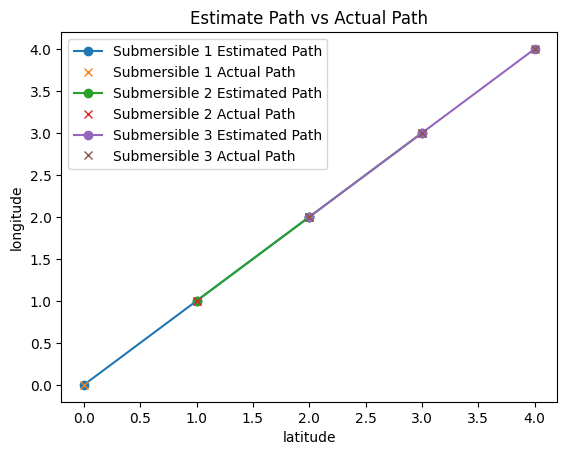

In [8]:
import matplotlib.pyplot as plt

# 假定以下数据结构包含了估计状态和实际测量值
# 每个submersible_tracks对应一个潜水器的轨迹，包含估计的状态和实际测量值
submersible_tracks = [
    {'estimated': [(0, 0), (0.99995, 0.99995), (1.99988575, 1.99988575)],
     'actual': [(0, 0), (1, 1), (2, 2)]},
    {'estimated': [(0.99995, 0.99995), (1.99990005, 1.99990005), (2.9999508, 2.9999508)],
     'actual': [(1, 1), (2, 2), (3, 3)]},
    {'estimated': [(1.99990001, 1.99990001), (2.99999997, 2.99999997), (4.00001586, 4.00001586)],
     'actual': [(2, 2), (3, 3), (4, 4)]}
]

# 创建图表和子图
fig, ax = plt.subplots()

# 遍历每个潜水器轨迹，绘制估计路径和实际测量值
for i, track in enumerate(submersible_tracks):
    # 分别提取状态和测量值
    est_states = track['estimated']
    act_measurements = track['actual']

    # 绘制估计状态
    est_lat, est_lon = zip(*est_states)
    ax.plot(est_lat, est_lon, '-o', label=f'Submersible {i+1} Estimated Path')

    # 绘制实际测量值
    act_lat, act_lon = zip(*act_measurements)
    ax.plot(act_lat, act_lon, 'x', label=f'Submersible {i+1} Actual Path')

# 设置图例
ax.legend()

# 设置标题和标签
ax.set_title('Estimate Path vs Actual Path')
ax.set_xlabel('latitude')
ax.set_ylabel('longitude')

# 显示图表
plt.show()


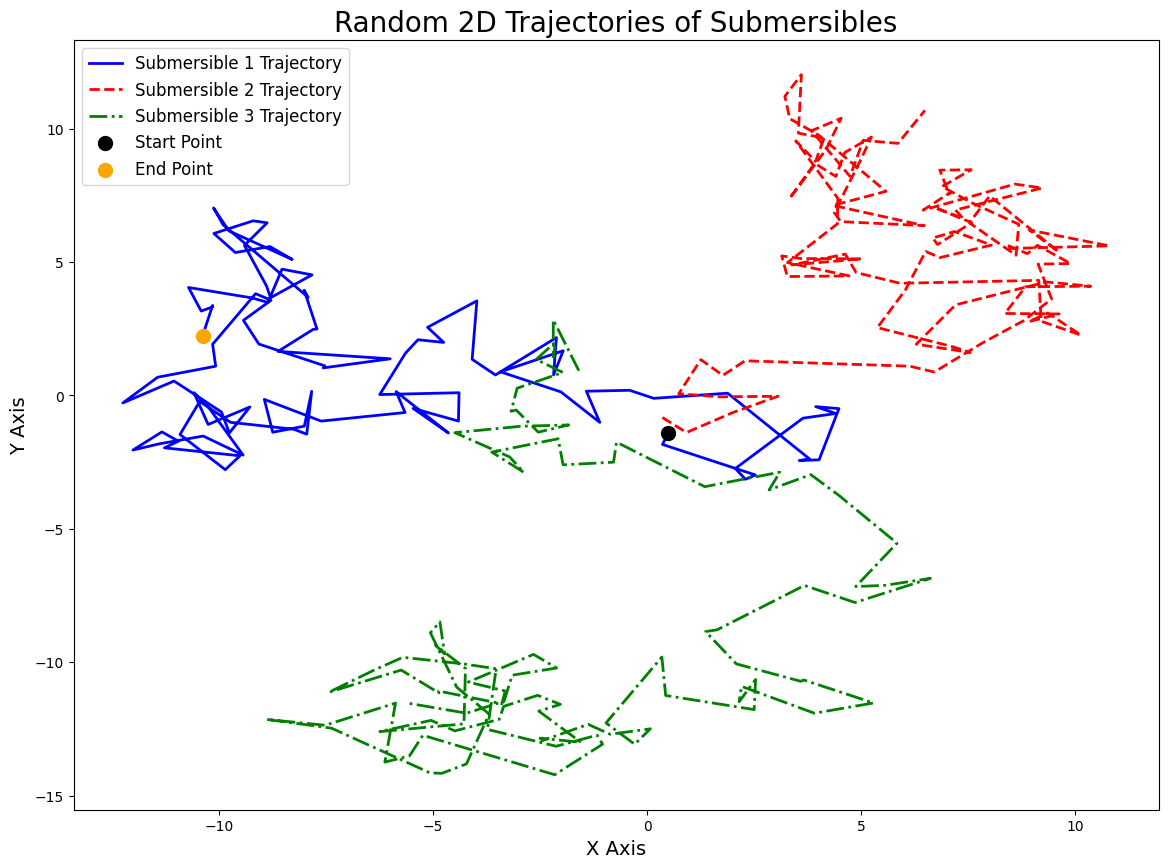

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子以便结果可复现
np.random.seed(42)

# 生成随机轨迹数据
t = np.linspace(0, 20, 100)
x1 = np.cumsum(np.random.randn(100))  # 随机行走轨迹
y1 = np.cumsum(np.random.randn(100))

x2 = np.cumsum(np.random.randn(100))
y2 = np.cumsum(np.random.randn(100))

x3 = np.cumsum(np.random.randn(100))
y3 = np.cumsum(np.random.randn(100))

# 创建二维图形
fig, ax = plt.subplots(figsize=(14, 10))

# 绘制三个潜水器的运动轨迹
ax.plot(x1, y1, label='Submersible 1 Trajectory', color='blue', linewidth=2)
ax.plot(x2, y2, label='Submersible 2 Trajectory', color='red', linestyle='--', linewidth=2)
ax.plot(x3, y3, label='Submersible 3 Trajectory', color='green', linestyle='-.', linewidth=2)

# 标记起点和终点
ax.scatter(x1[0], y1[0], color='black', s=100, label='Start Point', zorder=5)
ax.scatter(x1[-1], y1[-1], color='orange', s=100, label='End Point', zorder=5)

# 设置图形属性
ax.set_title('Random 2D Trajectories of Submersibles', fontsize=20)
ax.set_xlabel('X Axis', fontsize=14)
ax.set_ylabel('Y Axis', fontsize=14)
ax.legend(fontsize=12)

# 显示图形
plt.show()


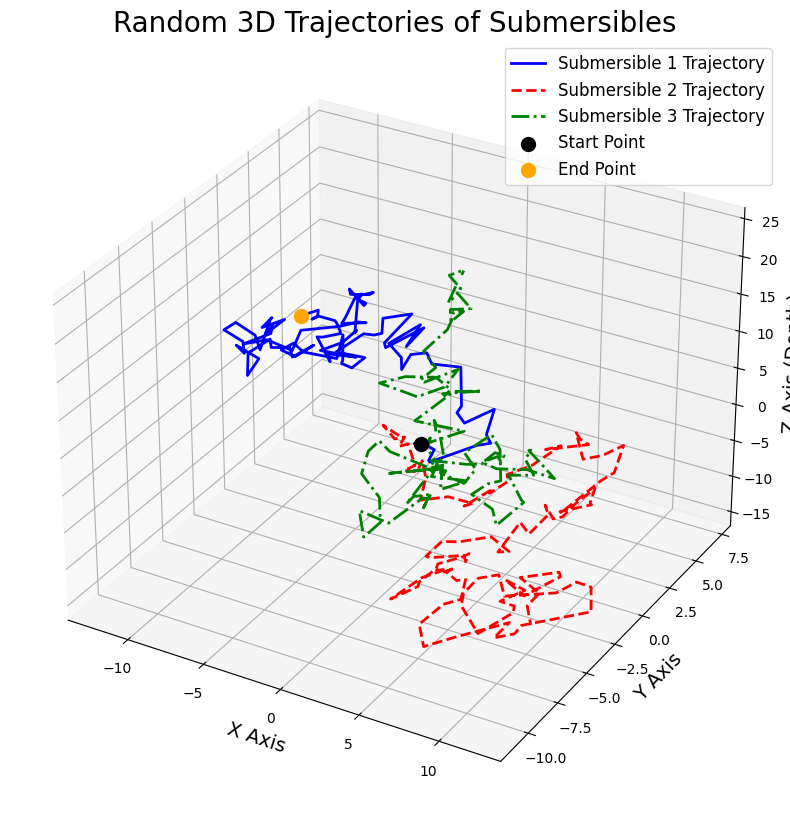

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 设置随机种子以便结果可复现
np.random.seed(42)

# 生成随机轨迹数据
t = np.linspace(0, 20, 100)
x1 = np.cumsum(np.random.randn(100))  # 随机行走轨迹
y1 = np.cumsum(np.random.randn(100))
z1 = np.cumsum(np.random.randn(100))  # 随机深度变化

x2 = np.cumsum(np.random.randn(100))
y2 = np.cumsum(np.random.randn(100))
z2 = np.cumsum(np.random.randn(100))

x3 = np.cumsum(np.random.randn(100))
y3 = np.cumsum(np.random.randn(100))
z3 = np.cumsum(np.random.randn(100))

# 创建三维图形
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# 绘制三个潜水器的运动轨迹
ax.plot(x1, y1, z1, label='Submersible 1 Trajectory', color='blue', linewidth=2)
ax.plot(x2, y2, z2, label='Submersible 2 Trajectory', color='red', linestyle='--', linewidth=2)
ax.plot(x3, y3, z3, label='Submersible 3 Trajectory', color='green', linestyle='-.', linewidth=2)

# 标记起点和终点
ax.scatter(x1[0], y1[0], z1[0], color='black', s=100, label='Start Point', zorder=5)
ax.scatter(x1[-1], y1[-1], z1[-1], color='orange', s=100, label='End Point', zorder=5)

# 设置图形属性
ax.set_title('Random 3D Trajectories of Submersibles', fontsize=20)
ax.set_xlabel('X Axis', fontsize=14)
ax.set_ylabel('Y Axis', fontsize=14)
ax.set_zlabel('Z Axis (Depth)', fontsize=14)
ax.legend(fontsize=12)

# 显示图形
plt.show()


灵敏度分析

In [9]:
!pip install SALib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.4 MB/s eta 0:00:00


In [12]:
import numpy as np
import xarray as xr
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import joblib
from SALib.sample import saltelli
from SALib.analyze import sobol

# 载入您的模型和scaler
model = load_model('/content/drive/MyDrive/2024MCM/my_lstm_model.h5')
scaler = joblib.load('/content/drive/MyDrive/2024MCM/scaler.save')

# 定义模型输入参数的范围
# 假设我们考虑两个参数：海流速度u和v，它们的变化范围分别是 [-3, 3] m/s
problem = {
    'num_vars': 2,
    'names': ['u', 'v'],
    'bounds': [[-3, 3],
               [-3, 3]]
}

# 生成样本
param_values = saltelli.sample(problem, 1000)

# 转换参数样本，以适应模型输入
param_values = scaler.transform(param_values)

# 预测
Y = np.zeros(param_values.shape[0])
for i, X in enumerate(param_values):
    X = X.reshape((1, 1, 2))
    predicted = model.predict(X)
    Y[i] = predicted[0, 0]

# 分析结果
Si = sobol.analyze(problem, Y, print_to_console=False)

# 打印出一阶、二阶和总效应
print(Si['S1'])
print(Si['S2'])
print(Si['ST'])


<ipython-input-12-acda9bc5e5f4>:23: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1000)
/usr/local/lib/python3.10/dist-packages/SALib/sample/saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1000) is equal to `2^n`.
        
  warnings.warn(msg)


流式输出内容被截断，只能显示最后 5000 行内容。
1/1 [==============================] - 0s 26ms/step
[0.82371862 0.03811798]
[[       nan 0.14264477]
 [       nan        nan]]
[0.96613106 0.17069285]
